In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
deliveries = pd.read_csv('deliveries.csv')

In [ ]:
print("First 5 rows of deliveries data:\n", deliveries.head())
print("\nDeliveries data info:\n", deliveries.info())

First 5 rows of deliveries data:
    match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_di

In [ ]:
print("\nNull values in deliveries data:\n", deliveries.isnull().sum())


Null values in deliveries data:
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [ ]:
deliveries['player_dismissed'].fillna('Not Out', inplace=True)
deliveries['fielder'].fillna('Not Applicable', inplace=True)

<ipython-input-5-f46d2d29cbe7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['player_dismissed'].fillna('Not Out', inplace=True)
<ipython-input-5-f46d2d29cbe7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
deliveries['dismissal_kind'].fillna('Not Applicable', inplace=True)

<ipython-input-6-1e90ff3abedc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['dismissal_kind'].fillna('Not Applicable', inplace=True)


In [ ]:
print("\nNull values after handling:\n", deliveries.isnull().sum())


Null values after handling:
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed         0
dismissal_kind           0
fielder                  0
dtype: int64


In [ ]:
extra_runs_by_team = deliveries.groupby('bowling_team')['extra_runs'].sum().sort_values(ascending=False).head(10)

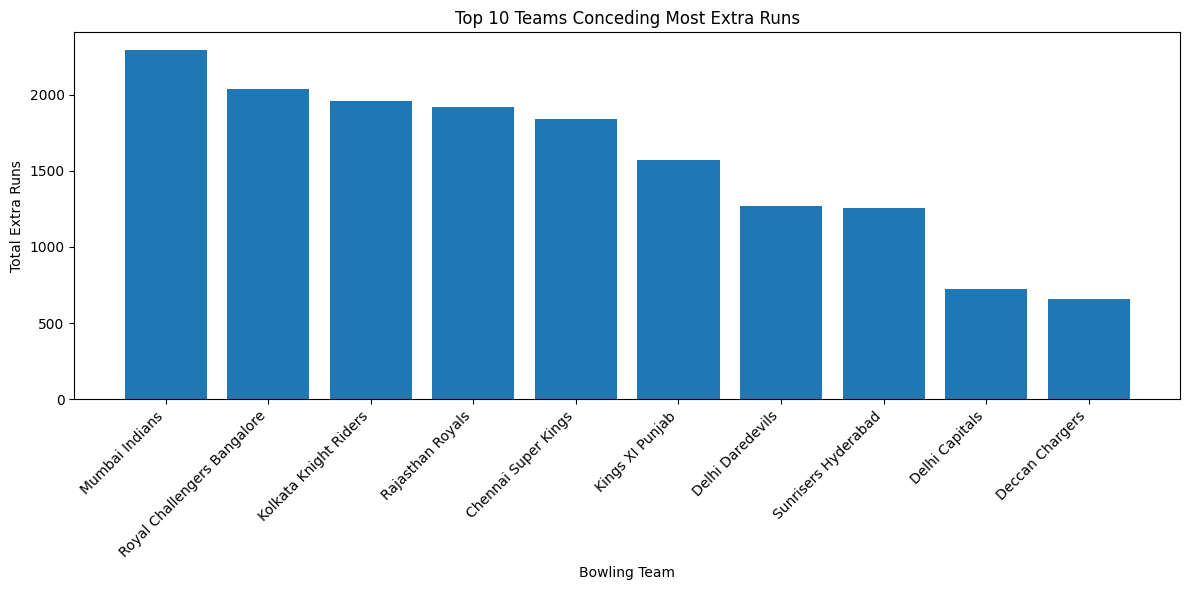

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(extra_runs_by_team.index, extra_runs_by_team.values)
plt.xlabel("Bowling Team")
plt.ylabel("Total Extra Runs")
plt.title("Top 10 Teams Conceding Most Extra Runs")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
matches_played_by_team = deliveries.groupby('bowling_team')['match_id'].nunique()

In [ ]:
extra_runs_per_match = extra_runs_by_team / matches_played_by_team[extra_runs_by_team.index]

In [ ]:
extra_runs_per_match = extra_runs_per_match.sort_values(ascending=False).head(10)

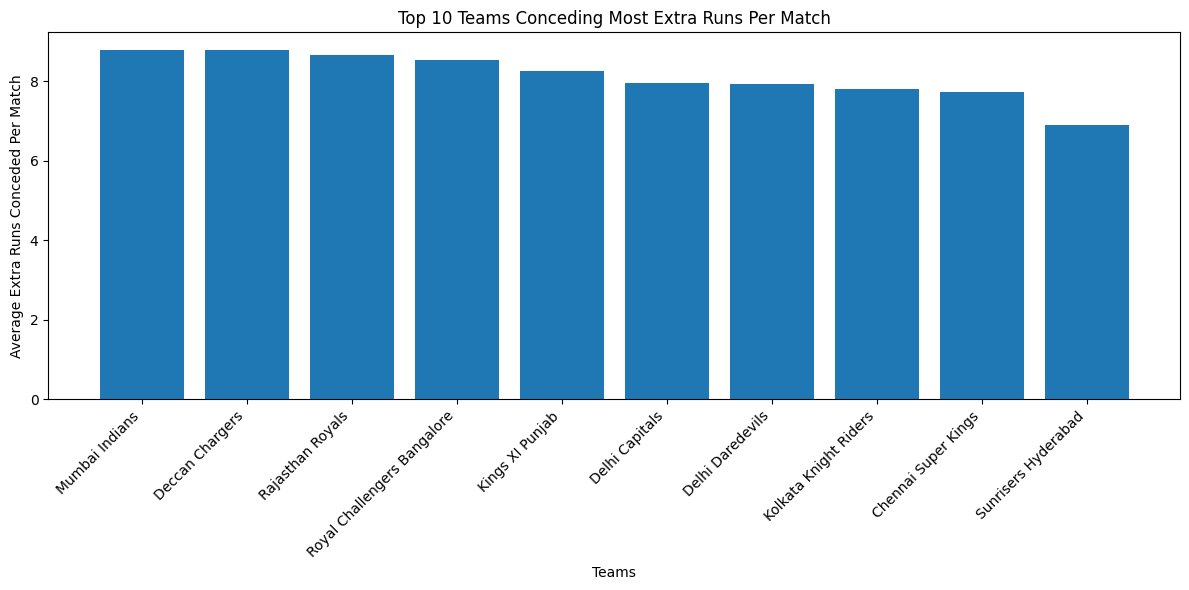

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(extra_runs_per_match.index, extra_runs_per_match.values)
plt.xlabel("Teams")
plt.ylabel("Average Extra Runs Conceded Per Match")
plt.title("Top 10 Teams Conceding Most Extra Runs Per Match")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
mumbai_deliveries = deliveries[deliveries['bowling_team'] == 'Mumbai Indians']

In [ ]:
try:
    mumbai_extras_count = mumbai_deliveries['extras_type'].value_counts().reset_index()
    mumbai_extras_count.columns = ['extra_type', 'count']
except KeyError:
    print(f"Available columns in mumbai_deliveries: {mumbai_deliveries.columns.tolist()}")

In [ ]:
fig = px.pie(mumbai_extras_count,
             names='extra_type',
             values='count',
             title='Distribution of Extra Runs Given by Mumbai Indians',
             labels={'extra_type': 'Extra Run Type', 'count': 'Frequency'})
fig.update_traces(hole=0.4)
fig.show()


Dismissal Type Counts:
 dismissal_kind
Not Applicable           247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
retired out                   3
Name: count, dtype: int64


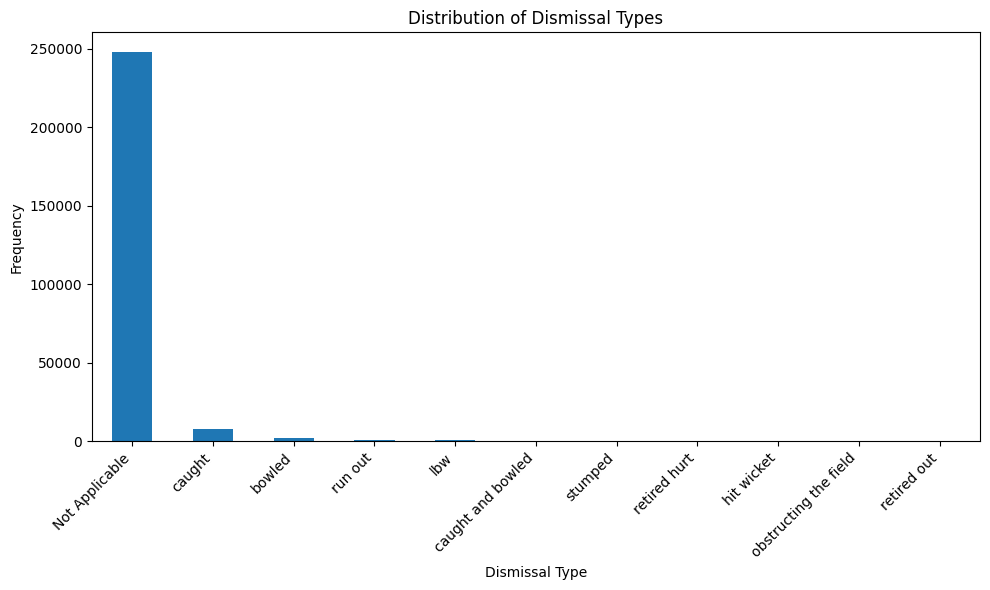

In [ ]:
dismissal_counts = deliveries['dismissal_kind'].value_counts()
print("\nDismissal Type Counts:\n", dismissal_counts)


plt.figure(figsize=(10, 6))
dismissal_counts.plot(kind='bar')
plt.title('Distribution of Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

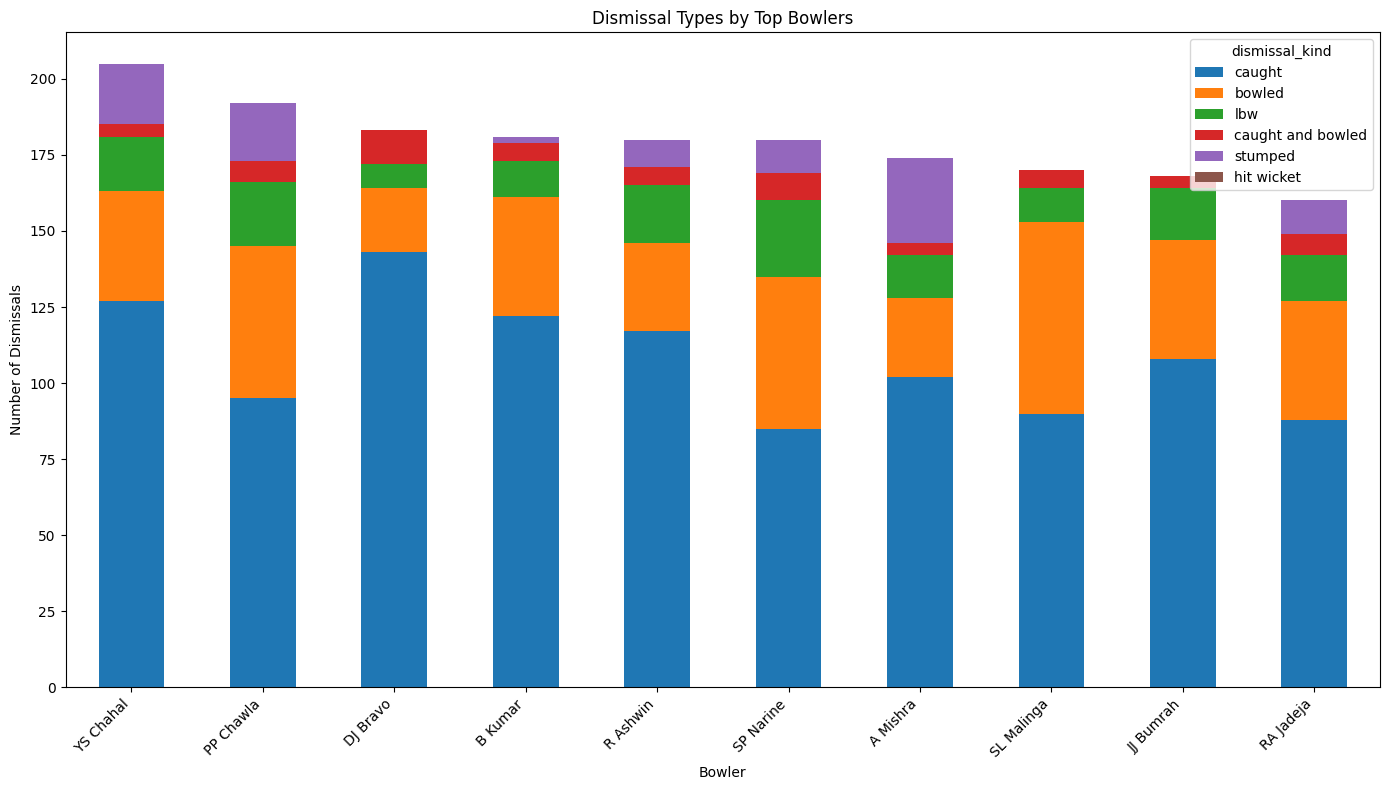

In [ ]:
bowler_dismissal = deliveries.groupby(['bowler', 'dismissal_kind']).size().unstack(fill_value=0)

bowler_dismissal=bowler_dismissal[['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']]
top_bowlers = bowler_dismissal.sum(axis=1).nlargest(10).index
bowler_dismissal = bowler_dismissal.loc[top_bowlers]


bowler_dismissal.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Dismissal Types by Top Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Number of Dismissals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

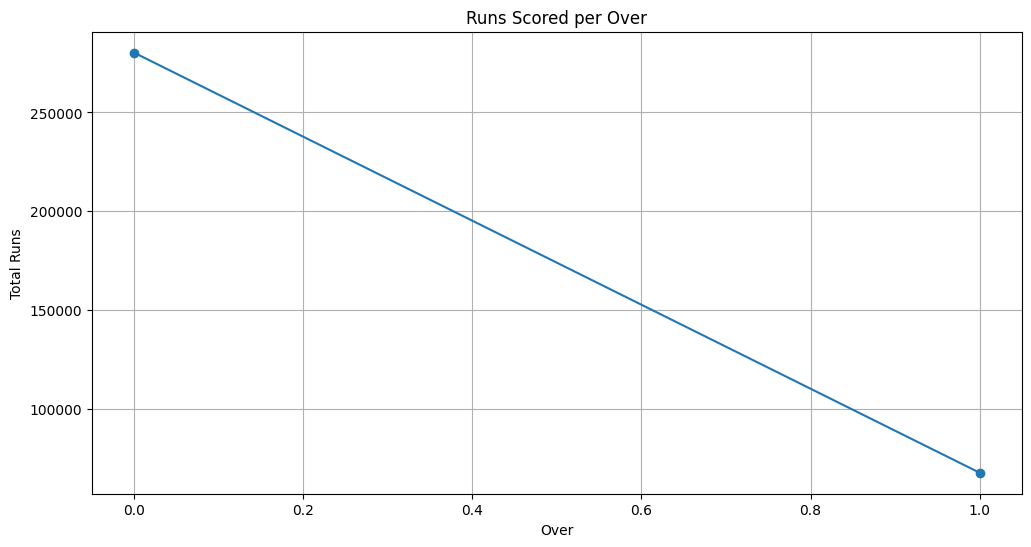

In [ ]:
deliveries['over'] = deliveries['ball'] // 6
runs_per_over = deliveries.groupby('over')['total_runs'].sum()

plt.figure(figsize=(12, 6))
runs_per_over.plot(kind='line', marker='o')
plt.title('Runs Scored per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()

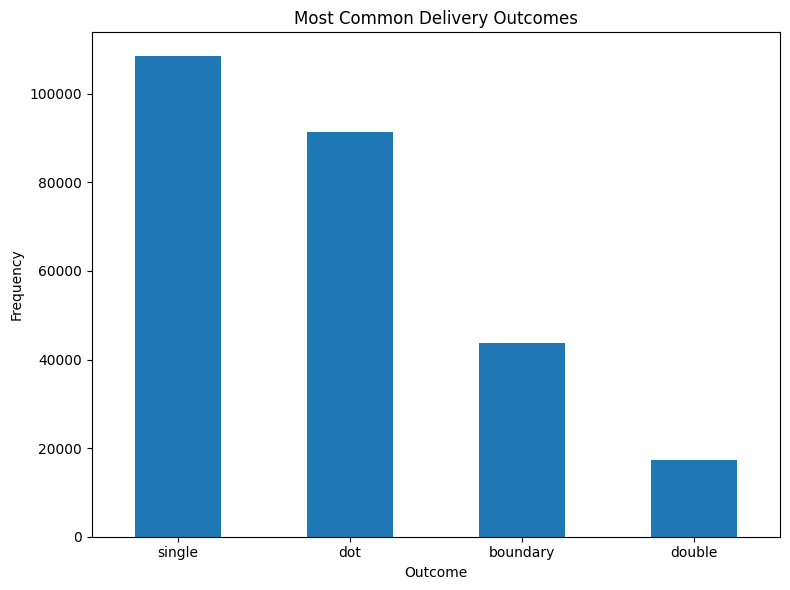

In [ ]:
deliveries['outcome'] = 'dot'
deliveries.loc[deliveries['total_runs'] == 1, 'outcome'] = 'single'
deliveries.loc[deliveries['total_runs'] == 2, 'outcome'] = 'double'
deliveries.loc[deliveries['total_runs'] >= 4, 'outcome'] = 'boundary'

outcome_counts = deliveries['outcome'].value_counts()

plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar')
plt.title('Most Common Delivery Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()